# **Carlini and Wagner** Attack and Binary Input Detector Using MNIST10





### **Carlini and Wagner (C&W) Attack - Overview**

The **Carlini and Wagner (C&W)** attack, introduced by **Nicholas Carlini** and **David Wagner** in 2017, is one of the most powerful and effective methods for generating adversarial examples. It is designed to be more effective and difficult to defend against compared to other adversarial attacks like **FGSM** and **PGD**.

The C&W attack specifically addresses some of the limitations of earlier methods by framing the generation of adversarial examples as an **optimization problem**. The attack minimizes a combination of the perturbation's magnitude and the model's loss (misclassification), while also introducing a regularization term to control the perceptibility of the adversarial perturbation.

#### **Key Concepts:**

**1. Adversarial Example:** A slightly modified version of the input that is intentionally crafted to cause a model to misclassify it.

**2. Optimization Problem:** The C&W attack formulates the creation of an adversarial example as an optimization problem, where the goal is to minimize a loss function that balances:
* The difference between the original and adversarial inputs (i.e., the perturbation magnitude).
* The model's confidence in the adversarial class (i.e., the model's misclassification).

**3. Regularization:** C&W uses regularization to ensure that the perturbation is not too large, which keeps the adversarial example visually similar to the original input.

#### **How the Carlini and Wagner Attack Works**

The C&W attack minimizes a loss function that includes three key components:

**1. The Loss for Misclassification:** Ensuring that the adversarial example is classified as the wrong class.

**2. The Perturbation Size:** Keeping the perturbation (i.e., the difference between the original and adversarial input) small.

**3. Regularization:** A term that controls the magnitude of the perturbation to ensure the adversarial example is visually similar to the original.

#### **Steps in the Carlini and Wagner Attack**

**1. Initialize the adversarial example** $x_{adv}​$. This is usually initialized as a slightly perturbed version of the original input $x$.

**2. Iterate the optimization process:**
* Compute the gradient of the objective function with respect to $x_{adv}$​.
* Update $x_{adv}$​ to minimize the objective function, using gradient-based optimization (e.g., L-BFGS).

**3. Termination:** The optimization stops when the adversarial example satisfies the condition for misclassification (or targeted classification) and the perturbation is within the acceptable magnitude range.

#### **Objective Function**

The C&W attack solves an optimization problem that minimizes the following objective function:
$$L(x_{adv},x,y)=max(0,f(x_{adv})_{y_{target}}−f(x_{adv})y+δ)+λ∥x_{adv}−x∥_{p}$$

Where:

* $x_{adv}$​ is the adversarial example.
* $x$ is the original input.
* $y$ is the true label of the input $x$.
* $y_{target}$​ is the target class that we want the adversarial example to be classified as. If we're performing a targeted attack, we set ytargetytarget​ to be a specific class (different from the original class), otherwise, it will simply aim to misclassify the input.
* $f(x_{adv})_{y}$​ and $f(x_{adv})_{y_{target}}$​​ represent the logits (raw output scores) of the model for the true label $y$ and the target label $y_{target}$​, respectively.
* $δ$ is a small constant that makes sure that the misclassification loss doesn't vanish.
* $λ$ is a regularization hyperparameter that controls the tradeoff between the loss for misclassification and the perturbation size.
* $∥x_{adv}−x∥_{p}$​ is the p-norm distance (usually $p=2$, i.e., the Euclidean norm), which measures the magnitude of the perturbation between the adversarial example and the original input.

#### **Detailed Breakdown of the Objective Function**

**1. Misclassification Term:**
* The term $max(0,f(x_{adv})_{y_{target}}−f(x_{adv})_{y}+δ)$ ensures that the adversarial example is classified as the target class $y_{target}$ (for a targeted attack) or misclassified (for an untargeted attack). This is known as a margin loss.
* This term ensures that the logits for the target class are larger than the logits for the original class by at least $δ$. The value of $δ$ is small, but ensures a sufficient gap between the logits of the target class and the original class to successfully fool the model.

**2. Regularization Term:**
* The term $λ∥x_{adv}−x∥_{p}$​ controls the perturbation size. The pp-norm $∥x_{adv}−x∥_{p}$​ measures the difference between the adversarial example and the original input.
* The parameter $λ$ allows us to adjust the tradeoff between making the perturbation smaller (thus keeping the adversarial example visually similar to the original) and fooling the model.

**3. Optimization:**
* The goal is to minimize this objective function. The optimization process is performed using gradient-based methods (such as L-BFGS or Adam), iteratively adjusting $x_{adv}$​ until the model classifies the adversarial example as the target class (or misclassifies it, in the case of an untargeted attack) and the perturbation remains within the desired size.

#### **Targeted vs. Untargeted Attacks**

* **Targeted Attack**: The goal is to make the model classify the adversarial example as a specific class $ytarget$​ that is different from the true class yy. The objective function is minimized such that $f(x_{adv})_{y_{target}}$​ is greater than $f(x_{adv})y$​ by at least $δ$.

* **Untargeted Attack**: The goal is simply to cause the model to misclassify the adversarial example, regardless of which incorrect class it is classified as. In this case, the objective function is adjusted so that the adversarial example's logits for the correct class are smaller than those for any incorrect class.

#### **Strengths of C&W Attack**

* **High Success Rate:** The C&W attack is known to be very effective against a wide range of defense mechanisms, including adversarial training and defensive distillation.
* **Controllable Perturbation:** By adjusting the regularization term $λ$, C&W allows for fine-grained control over the magnitude of the perturbation. This makes it possible to generate adversarial examples that are visually indistinguishable from the original inputs.
* **Targeted and Untargeted Options:** The attack is flexible, supporting both targeted and untargeted attacks.

#### **Weaknesses of C&W Attack**

* **Computationally Expensive:** The optimization process is more computationally expensive compared to methods like FGSM and PGD, as it involves iterative optimization and requires significant computational resources, especially for large models or high-dimensional inputs (such as images).
* **Optimization Sensitivity:** The success of the attack depends on the choice of hyperparameters, particularly $λ$, $δ$, and the optimization method. Improper tuning can lead to suboptimal results.

## **Implementation**

This notebook shows the Carlini and Wagner attack implmentation using the ART library against deep learning models trained on MNIST-10 dataset. The notebook covers the following:

* Load the required libariries
* Load the dataset and inspect the data
* Create a deep learning model
* Train and evaluate the deep learning model on the test
* Implement C&W attack using ART
* Create adversarial samples using the C&W attack
* Evaluate the deep leaarning model against the adversaarial samples
* Create a detector model to detect adversarial samples
* Train and evaluate the detector model

### Install and import requied Libraries

In [1]:
# Install the Adversarial Robustness Toolbox for creating and evaluating adversarial attacks.
!pip install adversarial-robustness-toolbox

# Install VisualKeras for visualizing model architecture with layer types and connections.
!pip install visualkeras

In [2]:
# Suppress warnings to keep the notebook output clean.
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and disable eager execution for compatibility with some ART components.
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

# Import numerical and visualization libraries.
import numpy as np
from matplotlib import pyplot as plt

# Import ART (Adversarial Robustness Toolbox) modules:
# - KerasClassifier wraps Keras models for ART compatibility.
# - CarliniL0Method, CarliniL2Method, CarliniLInfMethod is an evasion attack method.
# - BinaryInputDetector is used to detect adversarial inputs.
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import CarliniL0Method, CarliniL2Method, CarliniLInfMethod
from art.defences.detector.evasion import BinaryInputDetector

2025-08-26 15:59:58.498669: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 15:59:58.510849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756241998.526908  448309 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756241998.532092  448309 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-26 15:59:58.548404: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Load MNIST dataset

In [3]:
# Load MNIST dataset from TensorFlow's built-in datasets.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1].
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Get minimum and maximum pixel values (should be 0.0 and 1.0 after normalization).
min_val = x_train.min()
max_val = x_train.max()

# Output dataset shapes and value range for verification.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, min_val, max_val

((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 np.float32(0.0),
 np.float32(1.0))

### Inspect the Data

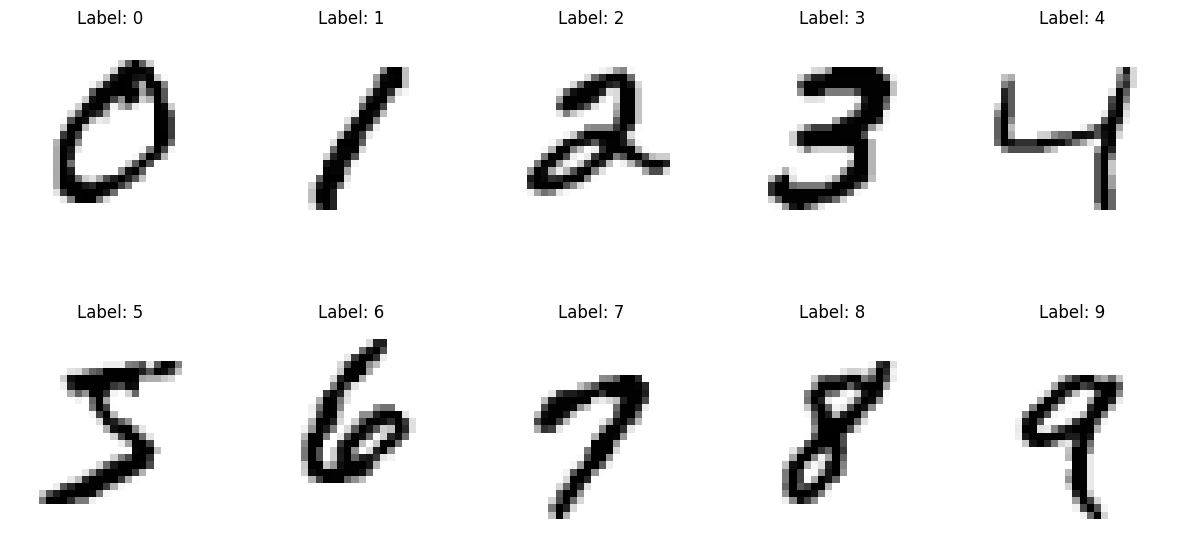

In [4]:
# Plot 10 sample images from the training set with their corresponding labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

# Display one example image for each digit label from 0 to 9.
for i in range(10):
    # Get the first image corresponding to label i
    img_idx = np.argwhere(y_train == i)[0][0]
    ax[i].imshow(x_train[img_idx], cmap='gray_r')
    ax[i].set_title(f"Label: {i}", fontsize=12)
    ax[i].axis('off')

### Reshape and one-hot encode the data

In [5]:
# Number of output classes (digits 0 through 9).
nb_classes = 10

# One-hot encode the labels for training and testing sets.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=nb_classes)

# Expand image dimensions to add a channel axis (from [28, 28] to [28, 28, 1]).
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## **Model Training**

#### **Model Description**

This convolutional neural network (CNN) is designed for image classification tasks. It consists of several layers that progressively extract features from the input images and classify them into one of 10 categories.

1. Input Layer: The model accepts input images of shape (28, 28, 1).
2. Convolutional Layers:
    * First Conv Layer: 32 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Second Conv Layer: 64 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
    * Third Conv Layer: 128 filters of size (3x3), activated by ReLU, followed by max pooling (2x2).
3. Flatten Layer: Converts the 2D feature maps to a 1D feature vector.
4. Dense Layer: Fully connected layer with 128 neurons, activated by ReLU, and includes a dropout of 20% to prevent overfitting.
5. Output Layer: 10 neurons with softmax activation to classify the input image into one of the 10 categories.

The model is compiled with the Adam optimizer and uses categorical cross-entropy loss, with accuracy as the performance metric.

In [6]:
# Define a sequential Convolutional Neural Network (CNN) model.
model = tf.keras.models.Sequential([
    # First convolutional block: Conv → ReLU → MaxPooling
    # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten the output to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected dense layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout for regularization

    # Output layer with softmax activation for multi-class classification
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

I0000 00:00:1756242002.277360  448309 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 44095 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:d5:00.0, compute capability: 8.6
I0000 00:00:1756242002.278617  448309 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 18139 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:17:00.0, compute capability: 7.5
I0000 00:00:1756242002.279764  448309 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 35945 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5


### Model Summary

In [7]:
# Print a detailed summary of the model architecture,
# including layer types, output shapes, and number of parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

### Visualize the CNN Architecture

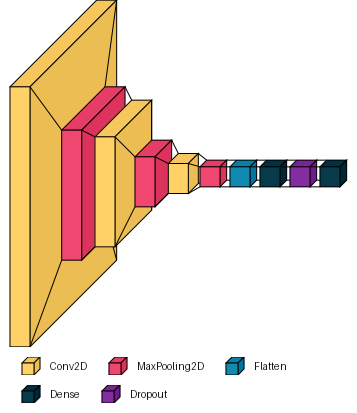

In [8]:
import visualkeras
# Display a layered visual representation of the model architecture.
# 'scale_xy' controls the scaling of the diagram.
# 'legend=True' shows layer types with corresponding color codes.
visualkeras.layered_view(model, scale_xy=10, legend=True)

### Visualize Model Architecture Diagram

In [9]:
# Generate and display a plot of the model architecture,
# showing each layer’s name and output shape.
# tf.keras.utils.plot_model(model, show_shapes=True, dpi = 75)

### Fit the model on training data.

In [10]:
# Train the model on the training data for 3 epochs.
# The history object stores training metrics and loss values.
# history = model.fit(x_train, y_train, epochs=10, batch_size=128)

## Load or Save the Trained Model

In [11]:
# If you have trained your own model and want to save it, uncomment and run:
model_path = './mnist10_model.keras'
# model.save(model_path)

# Otherwise, load the pretrained model provided (e.g., from Google Drive or HuggingFace).
!wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/mnist10_model.keras
model = tf.keras.models.load_model(model_path)

# Display the model architecture summary to make sure the model has successfully been loaded.
model.summary()

--2025-08-26 16:00:03--  https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/mnist10_model.keras
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1266398 (1.2M) [application/octet-stream]
Saving to: ‘mnist10_model.keras.8’

mnist10_model.keras 100%[===================>]   1.21M  --.-KB/s    in 0.1s    

2025-08-26 16:00:03 (11.2 MB/s) - ‘mnist10_model.keras.8’ saved [1266398/1266398]



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,736 (1.16 MB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,158 (793.59 KB)

### Evaluate Model Performance on Test Data

In [12]:
# Evaluate the model on the test dataset and get loss and accuracy.
loss_test, accuracy_test = model.evaluate(x_test, y_test)

# Print the test accuracy as a percentage.
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

I0000 00:00:1756242004.696192  448789 service.cc:148] XLA service 0x7bd840005bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756242004.696231  448789 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1756242004.696248  448789 service.cc:156]   StreamExecutor device (1): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1756242004.696252  448789 service.cc:156]   StreamExecutor device (2): Quadro RTX 8000, Compute Capability 7.5
2025-08-26 16:00:04.712165: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756242004.742120  448789 cuda_dnn.cc:529] Loaded cuDNN version 91200


128/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9853 - loss: 0.0759 

I0000 00:00:1756242005.496435  448789 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9896 - loss: 0.0566
Accuracy on test data: 98.96%


### Wrap the Keras Model with an ART Classifier

In [13]:
# Create an ART KerasClassifier to enable adversarial robustness tools.
# 'clip_values' defines the input data range for normalization and attack generation.
classifier = KerasClassifier(model=model, clip_values=(min_val, max_val))

# **Carlini and Wagner L_0 Attack**

## Overview

> class art.attacks.evasion.CarliniL0Method(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, binary_search_steps: int = 10, max_iter: int = 10, initial_const: float = 0.01, mask: Optional[ndarray] = None, warm_start: bool = True, max_halving: int = 5, max_doubling: int = 5, batch_size: int = 1, verbose: bool = True)


The L_0 distance metric is non-differentiable and therefore is ill-suited for standard gradient descent. Instead, we use an iterative algorithm that, in each iteration, identifies some features that don’t have much effect on the classifier output and then fixes those features, so their value will never be changed. The set of fixed features grows in each iteration until we have, by process of elimination, identified a minimal (but possibly not minimum) subset of features that can be modified to generate an adversarial example. In each iteration, we use our L_2 attack to identify which features are unimportant [Carlini and Wagner, 2016].*
Paper link: https://arxiv.org/abs/1608.04644


*\_\_init__(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, binary_search_steps: int = 10, max_iter: int = 10, initial_const: float = 0.01, mask: Optional[ndarray] = None, warm_start: bool = True, max_halving: int = 5, max_doubling: int = 5, batch_size: int = 1, verbose: bool = True)*

**Create a Carlini&Wagner L_0 attack instance.**

    Parameters
* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* binary_search_steps (int) – Number of times to adjust constant with binary search (positive value). If binary_search_steps is large, then the algorithm is not very sensitive to the value of initial_const. Note that the values gamma=0.999999 and c_upper=10e10 are hardcoded with the same values used by the authors of the method.
* max_iter (int) – The maximum number of iterations.
* initial_const (float) – The initial trade-off constant c to use to tune the relative importance of distance and confidence. If binary_search_steps is large, the initial constant is not important, as discussed in Carlini and Wagner (2016).
* mask – The initial features that can be modified by the algorithm. If not specified, the algorithm uses the full feature set.
* warm_start (bool) – Instead of starting gradient descent in each iteration from the initial image. we start the gradient descent from the solution found on the previous iteration.
* max_halving (int) – Maximum number of halving steps in the line search optimization.
* max_doubling (int) – Maximum number of doubling steps in the line search optimization.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* verbose (bool) – Show progress bars.

**generate(x: ndarray, y: Optional[ndarray] = None, \*\*kwargs) → ndarray**

Generate adversarial samples and return them in an array.

    Return type
* ndarray
    
    
    Parameters
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). If self.targeted is true, then y represents the target labels. If self.targeted is true, then y_val represents the target labels. Otherwise, the targets are the original class labels.


    Returns
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#carlini-and-wagner-l-0-attack

### Create an ART Carlini and Wagner L_0 Attack.

In [14]:
attack_cw_l0 = CarliniL0Method(classifier=classifier,
                              max_iter=10,
                              learning_rate=0.01,
                              initial_const=1e0,
                               verbose = True,
                               batch_size = 64
                               )

## Generate Adversarial Examples Using C&W Attack

In [15]:
# Reduce test set size to 100 samples for faster adversarial generation and evaluation.
x_test = x_test[:100]
y_test = y_test[:100]

# Generate adversarial examples from the reduced test set using the PGD attack.
x_test_adv = attack_cw_l0.generate(x_test)

## Save or Load C&W-Generated Adversarial Test Data

In [16]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
cw_data_path = 'cw_poison_data_MNIST10_test_S100.npz'
# np.savez(cw_data_path,
#          x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/pgd_poison_data_MNIST10_test_S100.npz

# x_test_data = np.load(pgd_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

## Visualize Adversarial Examples and Their Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


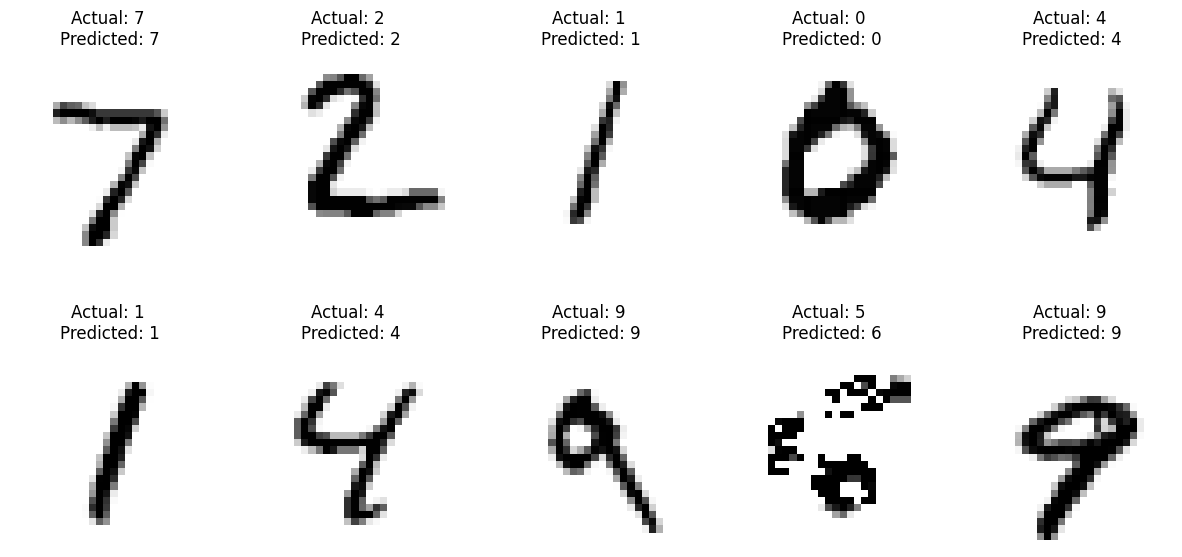

In [17]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image.squeeze(), cmap='gray_r')

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {label.argmax()} \nPredicted: {prediction}", fontsize=12)
    ax[i].axis('off')

## Evaluate the Model on Adversarial Test Data

In [18]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8800 - loss: 0.7477
Accuracy on adversarial test data: 88.00%
Average perturbation: 0.00


# Prepare Training Data for Adversarial Sample Detector

In [19]:
# Generate new adversarial examples from a subset of the training data using PGD.
x_train_adv = attack_cw_l0.generate(x_train[:100])
nb_train = x_train[:100].shape[0]

# Combine clean and adversarial samples to create a binary classification dataset for detection.
x_train_detector = np.concatenate((x_train[:100], x_train_adv), axis=0)

# Create labels: [1, 0] for clean samples, [0, 1] for adversarial samples.
y_train_detector = np.concatenate((
    np.array([[1, 0]] * nb_train),  # Clean
    np.array([[0, 1]] * nb_train)   # Adversarial
), axis=0)

##Save or Load Adversarial Detector Training Data

In [20]:
# Option 1: Save generated clean and adversarial samples for training the detector.
np.savez('./cw_l0_poison_data_MNIST10_train_S200.npz',
         x_train_detector=x_train_detector, y_train_detector=y_train_detector)

# Option 2: Load pre-saved detector training data to avoid regeneration.
# detector_data = np.load('./pgd_generated_data/pgd_detector_generated_MNIST10.npz')
# x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']

# Verify the shape of loaded or prepared data.
# x_train_detector.shape, y_train_detector.shape

## Build a similar CNN architecture model for detecting Adversarial Inputs

In [21]:
# Define a CNN model to detect adversarial vs. clean images (binary classification).
detector_model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', strides=1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Classification head
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')  # Two output classes: [clean, adversarial]
])

# Compile the detector model with Adam optimizer and categorical crossentropy loss.
detector_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Train the Adversarial Detector Model

In [22]:
# Train the adversarial detector model for 3 epochs.
# Since the goal is to distinguish between clean and adversarial inputs,
# a few epochs (e.g., 3) are typically sufficient to learn this binary classification task.
history = detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - accuracy: 0.4850 - loss: 0.7077
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4900 - loss: 0.7013 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 0.7011 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5100 - loss: 0.6927 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5150 - loss: 0.6924 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5050 - loss: 0.6938 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4650 - loss: 0.6944 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4550 - loss: 0.6931 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4950 - loss: 0.6939 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4950 - loss: 0.6934 


In [23]:
# Define path to save/load the detector model
detector_model_path = './CW_l0_detector_model_mnist10.keras'
detector_model.save(detector_model_path)

# Load the pre-trained detector model from the specified path
# detector_model = tf.keras.models.load_model(path)

# Display the model architecture to make sure the models has been loaded successfully.
detector_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,328 (1.25 MB)

 Trainable params: 109,442 (427.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,886 (855.03 KB)

## Prepare test samples for the detector model

In [24]:
# Get the number of original test samples
nb_test = x_test.shape[0]

# Combine clean and adversarial test images into one array
x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)

# Create corresponding labels: [1, 0] for clean, [0, 1] for adversarial
y_test_detector = np.concatenate((np.array([[1, 0]] * nb_test),
                                  np.array([[0, 1]] * nb_test)), axis=0)

### Evaluat the result

In [25]:
# --- Evaluate the detector model on combined test data ---

# Evaluate the model's performance on clean + adversarial samples
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)

# Print the accuracy as a percentage
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5000 - loss: 0.6933
Accuracy on test data: 50.00%


## Wrap detector model for adversarial detection

In [26]:
# Wrap the Keras detector model with ART's KerasClassifier
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)

# Create a BinaryInputDetector using the wrapped classifier
detector = BinaryInputDetector(detector_classifier)

## Train the BinaryInputDetector

In [27]:
## Train the BinaryInputDetector

# Train the detector on labeled clean and adversarial training data
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

## Evaluating the detector on adversarial data

In [28]:
# Apply the detector to the adversarial test data
_, is_adversarial = detector.detect(x_test_adv)

# Count how many adversarial samples were flagged
flag_adv = np.sum(is_adversarial)

# Display detection results
print("Adversarial test data (first 200 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(200 - flag_adv))

Adversarial test data (first 200 images):
Flagged: 0
Not flagged: 200


## Evaluating the detector on clean (non-adversarial) data

In [29]:
_, is_adversarial = detector.detect(x_test[:100])
flag_original = np.sum(is_adversarial)

print("Original test data (first 100 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(100 - flag_original))

Original test data (first 100 images):
Flagged: 0
Not flagged: 100


## Evaluate the detector across different attack strengths (eps values)


In [30]:
# Note: Detector was trained with adversarial samples generated using learning_rate = 0.01

learning_rate_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3]
nb_flag_adv = []      # Number of adversarial examples flagged by the detector
nb_missclass = []     # Number of adversarial examples that fooled the classifier

# Set a fixed number of optimization steps for all C&W L0 attacks
attack_cw_l0.set_params(**{'max_iter': 10})

for rate in learning_rate_range:
    # Update C&W L0 attack with current learning rate
    attack_cw_l0.set_params(**{'learning_rate': rate})

    # Generate adversarial examples for current learning rate
    x_test_adv = attack_cw_l0.generate(x_test[:100])

    # Count how many were flagged by the detector
    nb_flag_adv.append(np.sum(detector.detect(x_test_adv)[1]))

    # Count how many were misclassified by the classifier
    nb_missclass.append(
        np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))
    )

# Add clean data evaluation (learning_rate = 0) to the results
eps_range = [0] + learning_rate_range
nb_flag_adv = [flag_original] + nb_flag_adv  # flag_original from clean data detection
nb_missclass = [2] + nb_missclass            # 2 misclassifications in clean test subset

## Plot detector performance vs. classifier errors for varying attack strengths

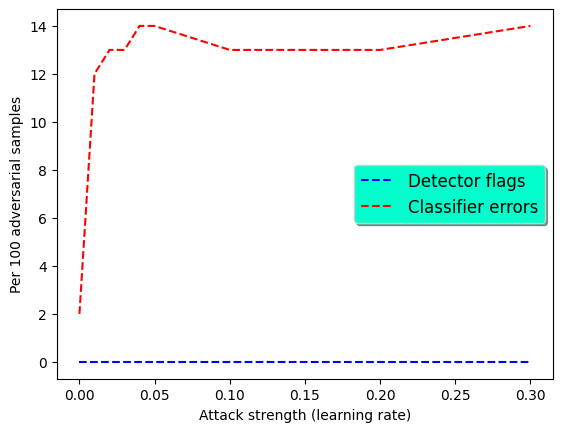

In [31]:
fig, ax = plt.subplots()

# Plot number of adversarial samples flagged by the detector
ax.plot(np.array(eps_range)[:10], np.array(nb_flag_adv)[:10], 'b--', label='Detector flags')

# Plot number of adversarial samples misclassified by the classifier
ax.plot(np.array(eps_range)[:10], np.array(nb_missclass)[:10], 'r--', label='Classifier errors')

# Customize legend
legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

# Add axis labels
plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')

# Display the plot
plt.show()


###  Carlini and Wagner L_2 Attack

> class art.attacks.evasion.CarliniL2Method(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, binary_search_steps: int = 10, max_iter: int = 10, initial_const: float = 0.01, max_halving: int = 5, max_doubling: int = 5, batch_size: int = 1, verbose: bool = True)

The L_2 optimized attack of Carlini and Wagner (2016). This attack is among the most effective and should be used among the primary attacks to evaluate potential defences. A major difference wrt to the original implementation (https://github.com/carlini/nn_robust_attacks) is that we use line search in the optimization of the attack objective.
* Paper link: https://arxiv.org/abs/1608.04644

*\_\_init__(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, binary_search_steps: int = 10, max_iter: int = 10, initial_const: float = 0.01, max_halving: int = 5, max_doubling: int = 5, batch_size: int = 1, verbose: bool = True) → None*

**Create a Carlini&Wagner L_2 attack instance.**

    Parameters:
* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* binary_search_steps (int) – Number of times to adjust constant with binary search (positive value). If binary_search_steps is large, then the algorithm is not very sensitive to the value of initial_const. Note that the values gamma=0.999999 and c_upper=10e10 are hardcoded with the same values used by the authors of the method.
* max_iter (int) – The maximum number of iterations.
* initial_const (float) – The initial trade-off constant c to use to tune the relative importance of distance and confidence. If binary_search_steps is large, the initial constant is not important, as discussed in Carlini and Wagner (2016).
* max_halving (int) – Maximum number of halving steps in the line search optimization.
* max_doubling (int) – Maximum number of doubling steps in the line search optimization.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* verbose (bool) – Show progress bars.

    
**generate(x: ndarray, y: ndarray | None = None, \*\*kwargs) → ndarray**

Generate adversarial samples and return them in an array.

    Return type:
* ndarray
    
    
    Parameters:
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). If self.targeted is true, then y represents the target labels. If self.targeted is true, then y_val represents the target labels. Otherwise, the targets are the original class labels.

    
    Returns:
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#carlini-and-wagner-l-2-attack



### Create a ART Carlini&Wagner Infinity-norm attack.

In [32]:
attack_cw_l2 = CarliniL2Method(classifier=classifier,
                              max_iter=100,
                              learning_rate=0.01,
                              initial_const=1e0,
                              )

### Generate adversarial test data.

In [ ]:
x_test_adv = attack_cw_l2.generate(x_test)

In [ ]:
# np.savez('./C&W_generated_data/C&W_l2_mnist-10_data.npz', x_test_adv = x_test_adv, y_test = y_test)

### Visualise the first adversarial test sample.

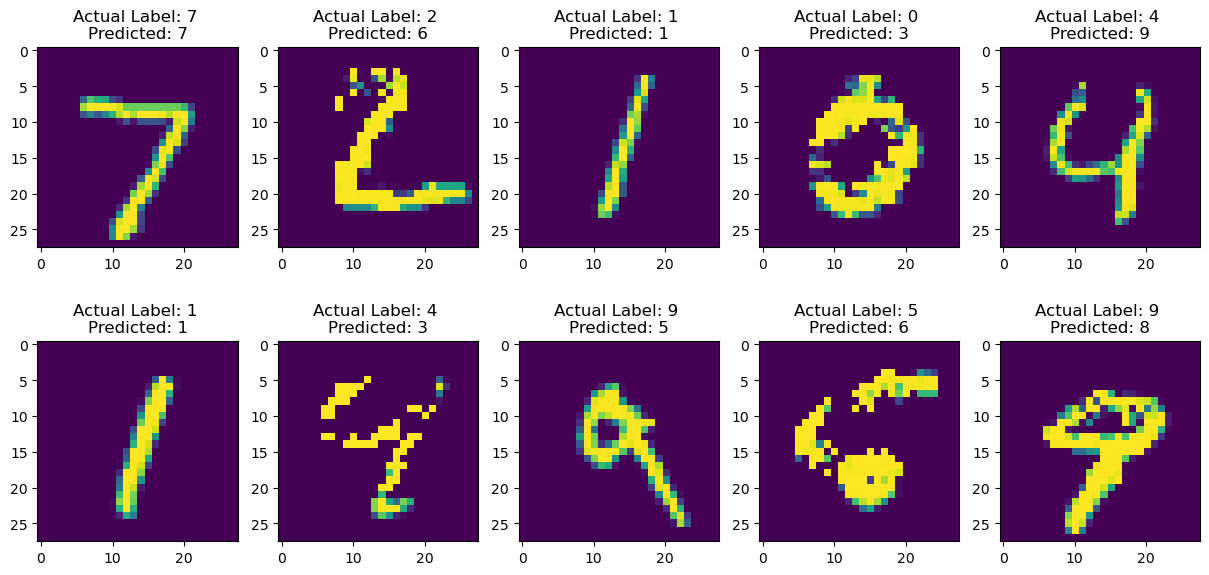

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
  #im_idx = np.argwhere(y_train == i)[0]
  ax[i].imshow(image)
  ax[i].set_title(f"Actual Label: {label.argmax()} \nPredicted: {model.predict(np.expand_dims(image, axis=0)).argmax()}",  fontsize=12)

### Evaluate accuracy on adversarial test data and calculate average perturbation.

In [ ]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

Accuracy on adversarial test data: 44.00%
Average perturbation: 0.02


### Training the Detector

We create the second model using Keras API with the same strucure of the classifier. Here we use the Keras Sequential model and add a sequence of layers. Afterwards the model is compiles with optimizer, loss function and metrics. This model will be used to classify between ordinary samples and perturbated ones

In [ ]:
x_train_adv = attack_cw_l2.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)
y_train_detector = np.concatenate((np.array([[1,0]]*nb_train), np.array([[0,1]]*nb_train)), axis=0)

In [ ]:
x_train_detector.shape, y_train_detector.shape

((1000, 28, 28, 1), (1000, 2))

In [ ]:
detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5863 - accuracy: 0.6490
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5798 - accuracy: 0.6550
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5823 - accuracy: 0.6540
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5717 - accuracy: 0.6660
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5829 - accuracy: 0.6440
Epoch 6/10
1000/1000 [==============================] - 1s 807us/sample - loss: 0.5755 - accuracy: 0.6570
Epoch 7/10
1000/1000 [==============================] - 1s 824us/sample - loss: 0.5768 - accuracy: 0.6590
Epoch 8/10
1000/1000 [==============================] - 1s 815us/sample - loss: 0.5789 - accuracy: 0.6560
Epoch 9/10
1000/1000 [==============================] - 1s 817us/sample - loss: 0.5905 - accuracy: 0.6370
Epoch 10/10
1000/1000 [===========

In [ ]:
nb_test = x_test.shape[0]

x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)
y_test_detector = np.concatenate((np.array([[1,0]]*nb_test), np.array([[0,1]]*nb_test)), axis=0)

In [ ]:
x_test_detector.shape, y_test_detector.shape

((200, 28, 28, 1), (200, 2))

In [ ]:
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Accuracy on test data: 65.00%


In [ ]:
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)
detector = BinaryInputDetector(detector_classifier)

In [ ]:
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

Train on 1000 samples
Epoch 1/3
1000/1000 [==============================] - 1s 837us/sample - loss: 0.5789 - accuracy: 0.6500
Epoch 2/3
1000/1000 [==============================] - 1s 844us/sample - loss: 0.5764 - accuracy: 0.6510
Epoch 3/3
1000/1000 [==============================] - 1s 842us/sample - loss: 0.5698 - accuracy: 0.6630


### Evaluating the detector
Apply the detector to the adversarial test data:

In [ ]:
_, is_adversarial = detector.detect(x_test_adv)
flag_adv = np.sum(is_adversarial)

print("Adversarial test data (first 100 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(100 - flag_adv))

Adversarial test data (first 100 images):
Flagged: 45
Not flagged: 55


#### Apply the detector to the first 100 original test images:

In [ ]:
_, is_adversarial = detector.detect(x_test[:100])
flag_original = np.sum(is_adversarial)

print("Original test data (first 100 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(100 - flag_original))

Original test data (first 100 images):
Flagged: 14
Not flagged: 86


Evaluate the detector for different attack strengths eps (Note: for the training of detector, eps=0.25 was used)

In [ ]:
learning_rate_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nb_flag_adv = []
nb_missclass = []


attack_cw_l2.set_params(**{'max_iter' : 10})

for rate in learning_rate_range:
    attack_cw_l2.set_params(**{'learning_rate': rate})
    x_test_adv = attack_cw_l2.generate(x_test[:100])
    nb_flag_adv += [np.sum(detector.detect(x_test_adv)[1])]
    nb_missclass += [np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))]

eps_range = [0] + learning_rate_range
nb_flag_adv = [flag_original] + nb_flag_adv
nb_missclass = [2] + nb_missclass

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

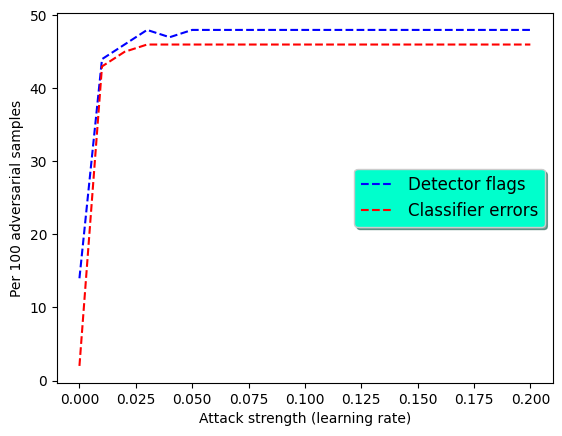

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.array(eps_range)[:8], np.array(nb_flag_adv)[:8], 'b--', label='Detector flags')
ax.plot(np.array(eps_range)[:8], np.array(nb_missclass)[:8], 'r--', label='Classifier errors')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')
plt.show()

### Carlini&Wagner Infinity-norm attack

> class art.attacks.evasion.CarliniLInfMethod(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, decrease_factor: float = 0.9, initial_const: float = 1e-05, largest_const: float = 20.0, const_factor: float = 2.0, batch_size: int = 1, verbose: bool = True)

This is a modified version of the L_2 optimized attack of Carlini and Wagner (2016). It controls the L_Inf norm, i.e. the maximum perturbation applied to each pixel.

*\_\_init__(classifier: CLASSIFIER_CLASS_LOSS_GRADIENTS_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, decrease_factor: float = 0.9, initial_const: float = 1e-05, largest_const: float = 20.0, const_factor: float = 2.0, batch_size: int = 1, verbose: bool = True) → None*

**Create a Carlini&Wagner L_Inf attack instance.**

    Parameters:
* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* max_iter (int) – The maximum number of iterations.
* decrease_factor (float) – The rate of shrinking tau, values in 0 < decrease_factor < 1 where larger is more accurate.
* initial_const (float) – The initial value of constant c.
* largest_const (float) – The largest value of constant c.
* const_factor (float) – The rate of increasing constant c with const_factor > 1, where smaller more accurate.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* verbose (bool) – Show progress bars.

**generate(x: ndarray, y: ndarray | None = None, \*\*kwargs) → ndarray**

Generate adversarial samples and return them in an array.

    Return type:
* ndarray
    
    
    Parameters:
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). If self.targeted is true, then y_val represents the target labels. Otherwise, the targets are the original class labels.

    
    Returns:
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#carlini-and-wagner-l-inf-attack



Create a ART Carlini&Wagner Infinity-norm attack.

In [ ]:
attack_cw_inf = CarliniLInfMethod(classifier=classifier,
                              max_iter=100,
                              learning_rate=0.01,
                              initial_const=1e0,
                              largest_const=2e0)

Generate adversarial test data.

In [ ]:
x_test_adv = attack_cw_inf.generate(x_test)

C&W L_inf:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
np.savez('./C&W_generated_data/C&W_inf_mnist-10_data.npz', x_test_adv = x_test_adv, y_test = y_test)

Visualise the first adversarial test sample.

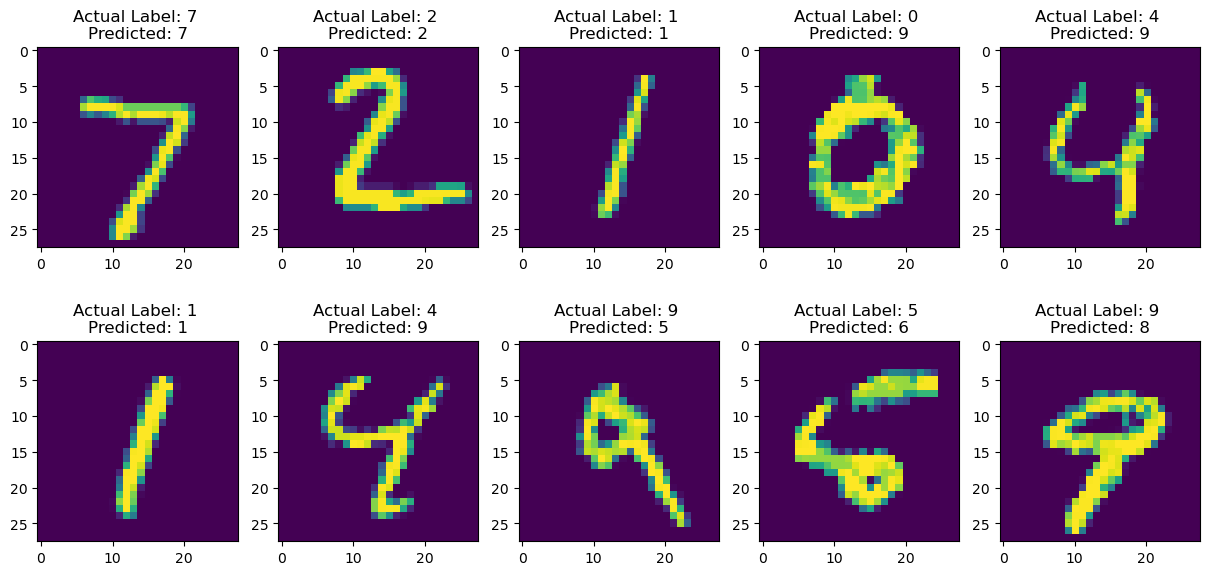

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
  #im_idx = np.argwhere(y_train == i)[0]
  ax[i].imshow(image)
  ax[i].set_title(f"Actual Label: {label.argmax()} \nPredicted: {model.predict(np.expand_dims(image, axis=0)).argmax()}",  fontsize=12)

Evaluate accuracy on adversarial test data and calculate average perturbation.

In [ ]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

Accuracy on adversarial test data: 37.00%
Average perturbation: 0.02


In [ ]:
x_train_adv = attack_cw_inf.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)
y_train_detector = np.concatenate((np.array([[1,0]]*nb_train), np.array([[0,1]]*nb_train)), axis=0)

C&W L_inf:   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 958us/sample - loss: 0.3816 - accuracy: 0.7990
Epoch 2/10
1000/1000 [==============================] - 1s 855us/sample - loss: 0.3918 - accuracy: 0.7920
Epoch 3/10
1000/1000 [==============================] - 1s 852us/sample - loss: 0.3602 - accuracy: 0.8000
Epoch 4/10
1000/1000 [==============================] - 1s 852us/sample - loss: 0.3520 - accuracy: 0.8020
Epoch 5/10
1000/1000 [==============================] - 1s 856us/sample - loss: 0.3582 - accuracy: 0.7970
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3460 - accuracy: 0.8040
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3493 - accuracy: 0.8010
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3286 - accuracy: 0.8090
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3262 - accuracy: 0.8070
Epoch 10/10
1000/1000 [=========

In [ ]:
nb_test = x_test.shape[0]

x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)
y_test_detector = np.concatenate((np.array([[1,0]]*nb_test), np.array([[0,1]]*nb_test)), axis=0)

In [ ]:
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Accuracy on test data: 67.00%


In [ ]:
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)
detector = BinaryInputDetector(detector_classifier)

In [ ]:
# detector.fit(x_train, y_train, batch_size = 128, nb_epochs= 5)
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

Train on 1000 samples
Epoch 1/3
1000/1000 [==============================] - 1s 922us/sample - loss: 0.3122 - accuracy: 0.7990
Epoch 2/3
1000/1000 [==============================] - 1s 835us/sample - loss: 0.2964 - accuracy: 0.8140
Epoch 3/3
1000/1000 [==============================] - 1s 835us/sample - loss: 0.3067 - accuracy: 0.8110


### Evaluating the detector

Apply the detector to the adversarial test data:

In [ ]:
_, is_adversarial = detector.detect(x_test_adv)
flag_adv = np.sum(is_adversarial)

print("Adversarial test data (first 100 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(100 - flag_adv))

Adversarial test data (first 100 images):
Flagged: 66
Not flagged: 34


Apply the detector to the first 100 original test images:

In [ ]:
_, is_adversarial = detector.detect(x_test[:100])
flag_original = np.sum(is_adversarial)

print("Original test data (first 100 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(100 - flag_original))

Original test data (first 100 images):
Flagged: 19
Not flagged: 81


Evaluate the detector for different attack strengths eps (Note: for the training of detector, eps=0.25 was used)

In [ ]:
learning_rate_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nb_flag_adv = []
nb_missclass = []


attack_cw_l2.set_params(**{'max_iter' : 10})

for rate in learning_rate_range:
    attack_cw_l2.set_params(**{'learning_rate': rate})
    x_test_adv = attack_cw_l2.generate(x_test[:100])
    nb_flag_adv += [np.sum(detector.detect(x_test_adv)[1])]
    nb_missclass += [np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))]

eps_range = [0] + learning_rate_range
nb_flag_adv = [flag_original] + nb_flag_adv
nb_missclass = [2] + nb_missclass

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

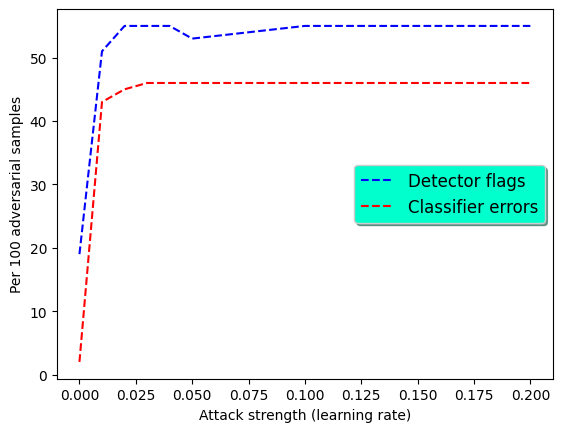

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.array(eps_range)[:8], np.array(nb_flag_adv)[:8], 'b--', label='Detector flags')
ax.plot(np.array(eps_range)[:8], np.array(nb_missclass)[:8], 'r--', label='Classifier errors')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')
plt.show()

## Summary of Carlini and Wagner Attack Implementation on a Dataset
#### **Overview**

I have implemented the Carlini and Wagner (C&W) attack on a dataset comprising images from multiple classes. The C&W attack is a sophisticated adversarial attack method designed to evaluate and challenge the robustness of machine learning models, particularly deep neural networks. This summary explains the workings of the C&W attack, its implementation, and the impact of various parameters on the effectiveness of the attack.

#### **C&W Attack Mechanism**

The Carlini and Wagner attack is an optimization-based adversarial attack that aims to find minimal perturbations necessary to mislead the model while ensuring the perturbed images remain visually similar to the original ones. The attack minimizes the perturbation subject to the constraint that the perturbed image is misclassified by the model. The key steps in the C&W attack are:

1. Objective Function: Define an objective function that combines the goal of minimizing the perturbation with the goal of misclassifying the input. The C&W attack typically uses the following objective function:
    min⁡∥δ∥p+c⋅f(x+δ)
    min∥δ∥p​+c⋅f(x+δ)

2. where δδ is the perturbation, ∥δ∥p∥δ∥p​ is the p-norm of the perturbation, cc is a constant balancing the two objectives, and ff is a function that measures the success of the attack (i.e., whether the perturbed image x+δx+δ is misclassified).

3. Optimization: Use a gradient-based optimization method to solve the above objective function. The optimization aims to find the smallest perturbation δδ that misleads the model.

4. Perturbation Bound: Ensure the perturbation δδ remains within a specified range to maintain the visual similarity between the original and perturbed images.

#### **Impact of Parameters**

The success and subtlety of the C&W attack are influenced by several parameters:

* Norm (p-norm): The choice of norm (typically L2L2​ or L∞L∞​) affects the nature of the perturbation. The L2L2​ norm aims for minimal overall change, while the L∞L∞​ norm limits the maximum change to any single pixel.
* Constant cc: This parameter balances the trade-off between minimizing the perturbation and ensuring successful misclassification. A larger cc emphasizes misclassification, potentially leading to larger perturbations.
* Optimization Parameters: Learning rate, number of iterations, and other optimization settings can impact the efficiency and effectiveness of the attack.

#### **Results and Observations**

The implementation of the C&W attack on the dataset demonstrated the following:

* Small Perturbations: The C&W attack is effective in generating adversarial examples with minimal perceptual changes. Even small perturbations can significantly decrease the model's accuracy.
* Parameter Sensitivity: The success of the attack is highly sensitive to the choice of parameters. Fine-tuning cc and the norm used is crucial for balancing attack success and perturbation visibility.
* Model Robustness: The attack reveals vulnerabilities in the model, highlighting the need for improved robustness and adversarial training.

#### **Conclusion**

The Carlini and Wagner attack showcases the vulnerability of machine learning models to carefully crafted adversarial examples. By optimizing perturbations to be minimal yet effective, the C&W attack challenges the robustness of neural networks. Understanding and mitigating such attacks are essential for developing resilient models. Experimenting with different parameters provides insights into the trade-offs between attack success and perturbation subtlety, guiding the development of more secure machine learning systems.